In [2]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt


Text(0, 0.5, 'y')

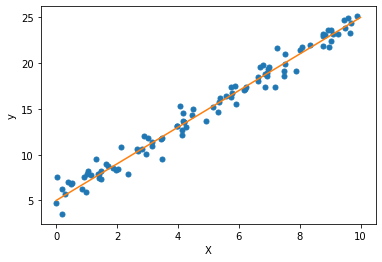

In [13]:
## simulation of linear regresion plot.
n = 100
beta_0, beta_1 = 5., 2.
np.random.seed(1)
X = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * X + ss.norm.rvs(loc=0, scale=1, size=n)

plt.figure()
plt.plot(X, y, "o", ms=5)
xx = np.array([0, 10])
plt.plot(xx, beta_0 + beta_1 * xx)
plt.xlabel("X")
plt.ylabel("y")

In [17]:
def compute_rss(y_estimate, y):
    return sum(np.power(y - y_estimate, 2))

def estimate_y(x, b_0, b_1):
    return b_0 + b_1 * x

compute_rss(estimate_y(X, beta_0, beta_1), y)

81.540007425512

#### 5.1.4: Least Squares Estimation in Code

Estimate for the slope: 2.003999999993347


Text(0, 0.5, 'RSS')

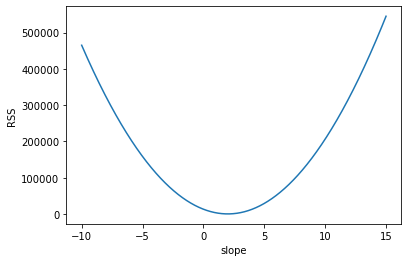

In [27]:
rss = []
slopes = np.arange(-10, 15, .001)
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * X)**2))

ind_min = np.argmin(rss)
print('Estimate for the slope: {}'.format(slopes[ind_min]))

plt.plot(slopes, rss)
plt.xlabel("slope")
plt.ylabel("RSS")


#### 5.1.5: Simple Linear Regression in Code

In [37]:
import statsmodels.api as sm


X_one = sm.add_constant(X)  # concatenate 1's ones to the first column


mod = sm.OLS(y, X_one)
est = mod.fit()


print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           7.47e-82
Time:                        14:59:02   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

#### 5.1.7: scikit-learn for Linear Regression

In [44]:

n = 500
beta_0 = 5
beta_1 = 2
beta_2 = -1
np.random.seed(1)
x_1 = 10 * ss.uniform.rvs(size=n)
x_2 = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1*x_1 + beta_2*x_2 + ss.norm.rvs(loc=0, scale=1, size=n)

X = np.stack([x_1, x_2], axis=1)


Text(0.5, 0, '$y$')

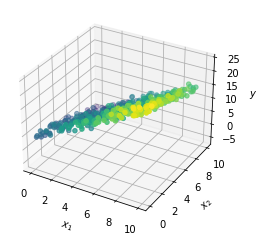

In [46]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

In [49]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression(fit_intercept=True)
lm.fit(X, y)
lm.intercept_, lm.coef_


(5.154077763777252, array([ 1.9999379 , -1.02026449]))

In [55]:
X_0 = np.array([2, 4])
lm.predict(X_0.reshape(1, -1))

array([5.07289561])

In [57]:
lm.score(X, y)

0.9798997316600129

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)

LinearRegression()

In [64]:
lm.score(X_test, y_test)

0.9794930834681773

## Part 2: Logistic Regression

In [66]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [71]:
h = 1
std = 1
n = 50

def gen_data(n, h, std1, std2):
    x1 = ss.norm.rvs(-h, std, n)
    y1 = ss.norm.rvs(0, std, n)
    x2 = ss.norm.rvs(h, std2, n)
    y2 = ss.norm.rvs(0, std2, n)
    return (x1, y1, x2, y2)

(x1, y1, x2, y2) = gen_data(50, 1, 1, 1.5)

In [84]:
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)

In [78]:
def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1, y1, "o", ms=2)
    plt.plot(x2, y2, "o", ms=2)
    plt.xlabel('$X_1$')
    plt.ylabel('$X_2$')
        

<IPython.core.display.Javascript object>


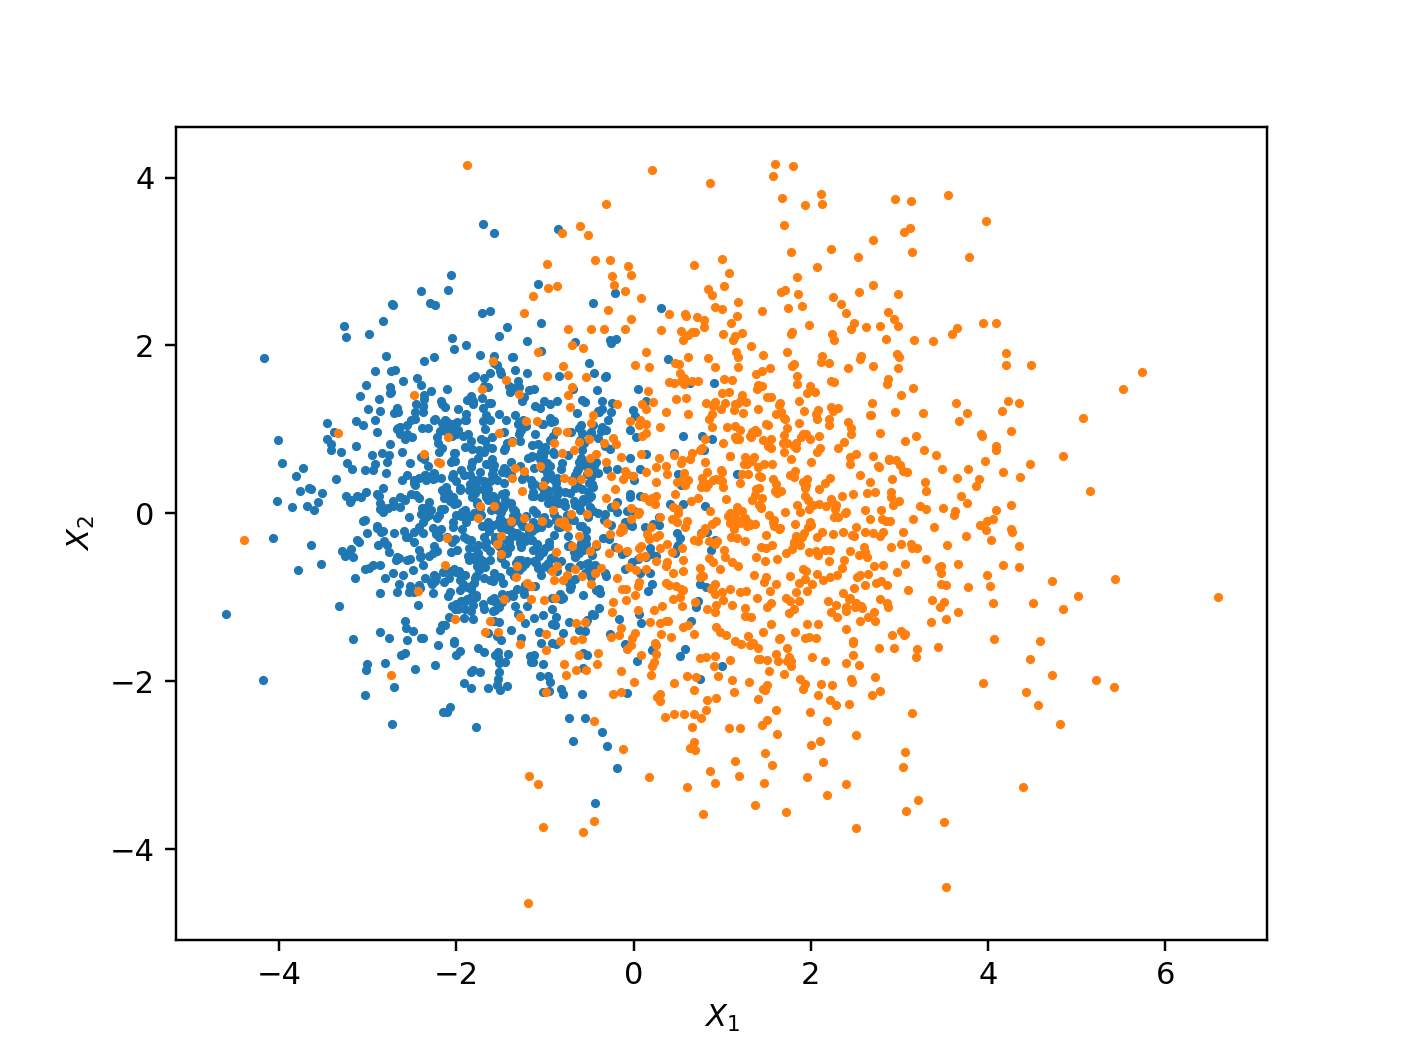

In [85]:
plot_data(x1, y1, x2, y2)

<IPython.core.display.Javascript object>


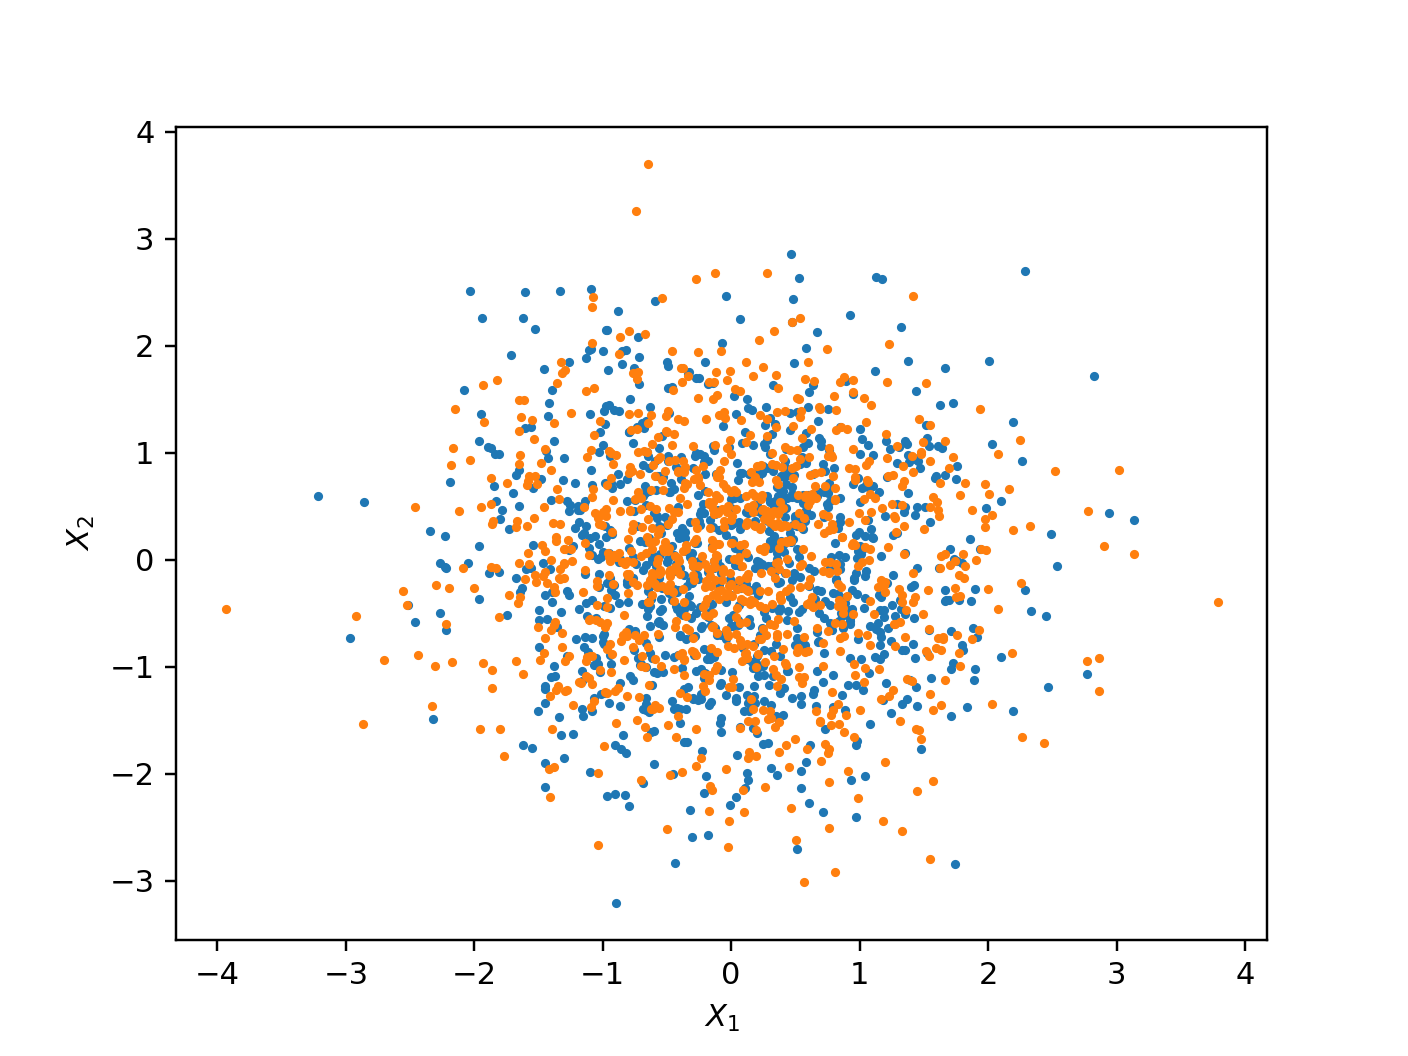

In [97]:
(x1, y1, x2, y2) = gen_data(1000, 0, 1, 1)
plot_data(x1, y1, x2, y2)

In [109]:
def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

prob_to_odds(.8)

4.000000000000001

### Learn how to use the scikit-learn library to perform logistic regression

In [138]:
from sklearn.linear_model import LogisticRegression


In [139]:
clf = LogisticRegression()


In [162]:
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)
X = np.vstack((np.vstack((x1, y1)).T, np.vstack((x2, y2)).T))
X.shape

n = 1000
y = np.hstack((np.repeat(1, n), np.repeat(2, n)))
y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.907

In [167]:
out = clf.predict_proba(np.array([-2, 0]).reshape(1, -1))
print(out)
print(np.sum(out))
print(clf.predict(np.array([-2, 0]).reshape(1, -1)))

[[0.9550431 0.0449569]]
1.0
[1]


#### 5.2.4: Computing Predictive Probabilities Across the Grid


In [168]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")
    
    

<IPython.core.display.Javascript object>


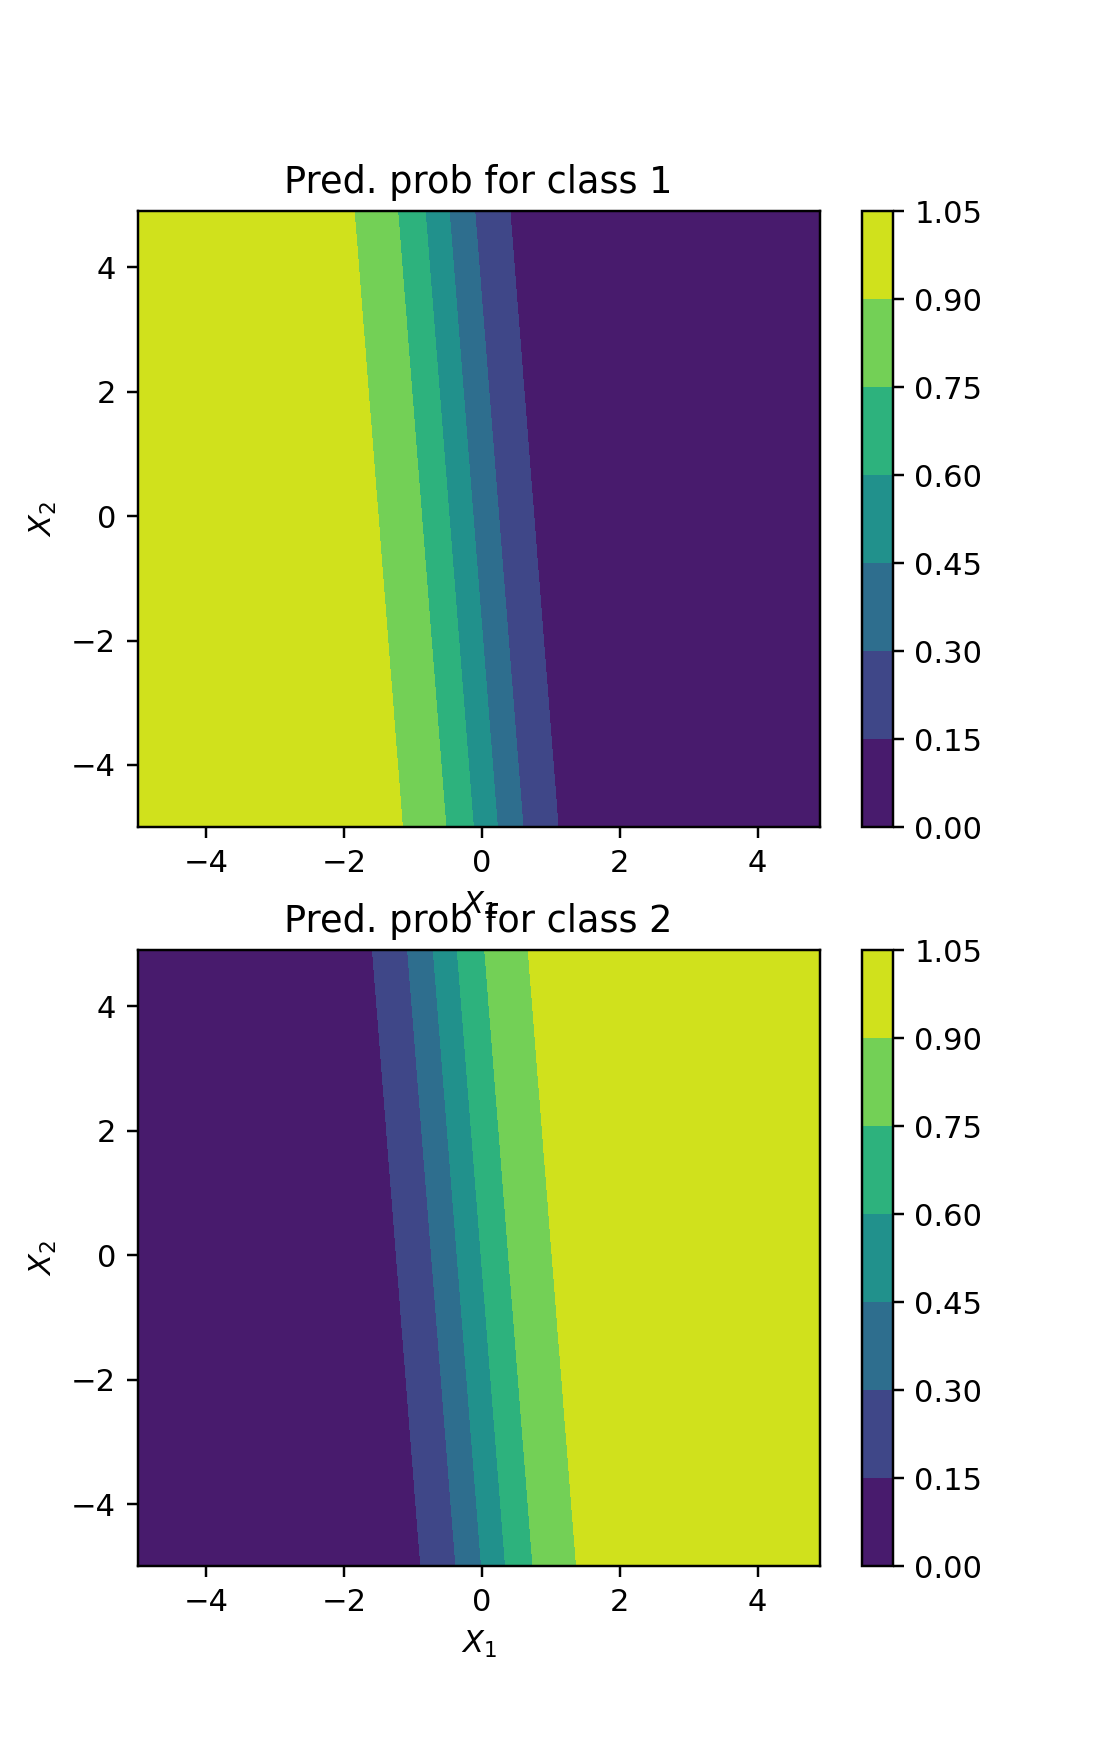

In [169]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");

### 5.3.1: Tree-Based Methods for Regression and Classification